# Assignment 3

**name:** Mustafa Habeb

**email:** mh224tb@student.lnu.se

In this Assignment, you will use Python to handle several exercises related the last 4 topics of the course.
All exercises are individual. 
We expect you to submit a Jupyter Notebook (i.e., pre-organized and provided through Moodle). 
Your submission should include all the datasets and files we need to run your programs (we will run your notebook). 
When grading your assignments, we will, in addition to functionality, also take into account code quality. 
We expect well-structured and efficient solutions.

## Lecture 6 - Decision Trees and Ensembles

**Dataset:** Bank Marketing Dataset (UCI)

**Variables description:** Check the bank-aditional-names.txt file

**Task Description:** Predict whether a client will subscribe to a term deposit (y column) based on marketing data.

### Task 1 (mandatory): Data Exploration and Preprocessing

Load and clean the dataset (bank-additional-full.csv). Encode categorical features. Split the dataset into training and testing sets.

**Plot:** Show class distribution (e.g., a print) of the target variable and a bar chart of the most frequent categorical values.

**Discuss:** Is the dataset imbalanced? Which features stand out?

--- Your answer here ---

**Is the dataset imbalanced?**  
Yes, the dataset is clearly imbalanced. As shown in the value counts and the bar chart, most of the samples belong to the `"no"` class — (33987) — while only 4258 are labeled `"yes"`. This means only about 11% of the people in the dataset subscribed, which can be a problem for modeling because the classifier might just learn to always predict `"no"` to get high accuracy.

**Which features stand out?**  
One of the features that really stands out is `"job"`. From the bar chart, we can see that certain job categories like `"admin."`, `"blue-collar"`, and `"technician"` appear way more often than others. On the other hand, categories like `"unemployed"`, `"housemaid"`, and `"entrepreneur"` are much less frequent. This kind of imbalance across job types could affect how the model learns patterns, especially if some jobs are underrepresented.


y
no     33987
yes     4258
Name: count, dtype: int64


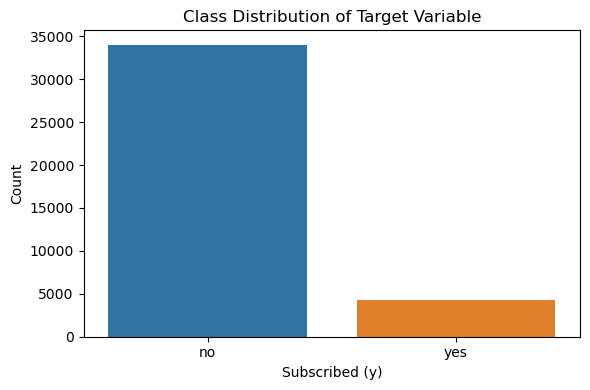

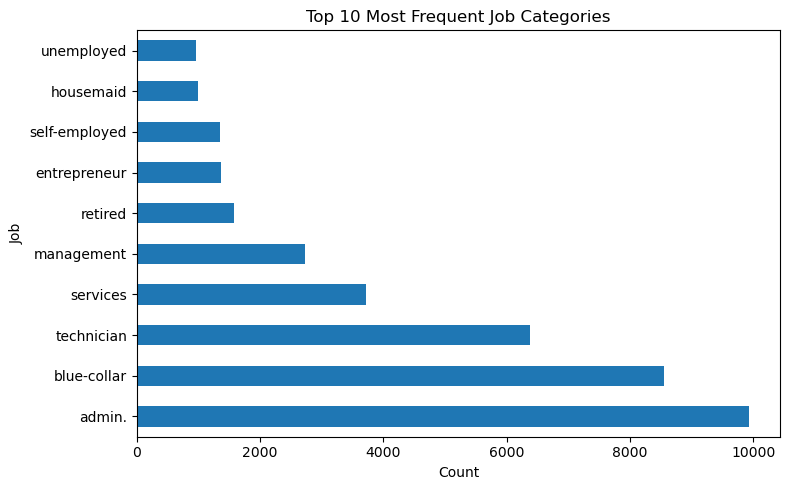

In [19]:
#--- Write your code here ---#
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#--- starting by loading the dataset ---#
df = df = pd.read_csv('datasets/BankMarketing/bank-additional-full.csv', sep=';')

#--- according to the inforamtion in the bank-additional-names.txt---#
#---duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target 
# (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
# Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
df = df.drop(columns=['duration'])

#--- I chosed to remove rows with "unkown" in some columns beacuse they have a fewer "unkown" than others ---# 
# columns_with_unkown: are the columns thats contains the the fewer "unknown".
# Note: I chose NOT to remove rows with "unknown" in the 'default' column.
# According to the dataset documentation, "unknown" can be treated as a valid category.
# In this case, "unknown" appears frequently in the 'default' column and removing those rows
# would significantly reduce the dataset size. So I kept them and handled encoding later.
columns_with_unkown = ['job', 'marital', 'education', 'housing', 'loan']
df = df[~df[columns_with_unkown].isin(['unknown']).any(axis=1)]

#--- define X and y, and encode the target as binary(1 or 0) ---#
X = df.drop('y', axis=1)
y = df['y'].map({'no': 0, 'yes': 1})  

#--- encode the categorical columns by using one-hot encoding to 10 categorical columns ---#
#--- the i used OneHotEncoder(drop='first') to avoid multicollinearity by dropping the first category of each column ---#
#--- i used ColumnTransformer to apply the encoder only to the categorical columns and Leave all numerical features unchanged using remainder='passthrough' ---#
categorical_columns = [
    'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'day_of_week', 'poutcome'
]
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_columns)],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(X)

#--- Split the dataset into training and testing sets ---#
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

#--- Show class distribution (e.g., a print) of the target variable and a bar chart of the most frequent categorical values ---#

#- Print the class distribution of the target variable 'y' to check for class imbalance
print(df['y'].value_counts())

#- plot the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Class Distribution of Target Variable')
plt.xlabel('Subscribed (y)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#- bar chart of the most frequent categorical values
plt.figure(figsize=(8, 5))
df['job'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Most Frequent Job Categories')
plt.xlabel('Count')
plt.ylabel('Job')
plt.tight_layout()
plt.show()

### Task 2 (Mandatory): Train a decision tree using scikit-learn.

Use max depth = 4 for initial interpretability. Visualize the tree using plot_tree().

**Discuss:** Which features are used at the top levels of the tree? Are they intuitive? 

--- Your answer here ---


The features that are used at the top levels of the decision tree were:

- **`poutcome_success`** (from the previous marketing outcome)  
- **`nr.employed`** (number of employees in the economy)  
- **`cons.conf.idx`** (consumer confidence index)

These features are quite intuitive in the context of the dataset.

- **`poutcome_success`** makes sense as a top feature because if a client had a successful previous campaign, they are more likely to respond positively again.
- **`nr.employed`** reflects overall economic health. A stronger job market might influence people to feel more financially secure and open to term deposits.
- **`cons.conf.idx`** indicates how confident consumers are about the economy. Higher confidence may lead to more willingness to save or invest.

All the features that are used at the top of the tree are logical and align with realworld reasoning. As we can see, that the model seems to focus early on variables that reflect both the client’s previous behavior and general economic conditions.


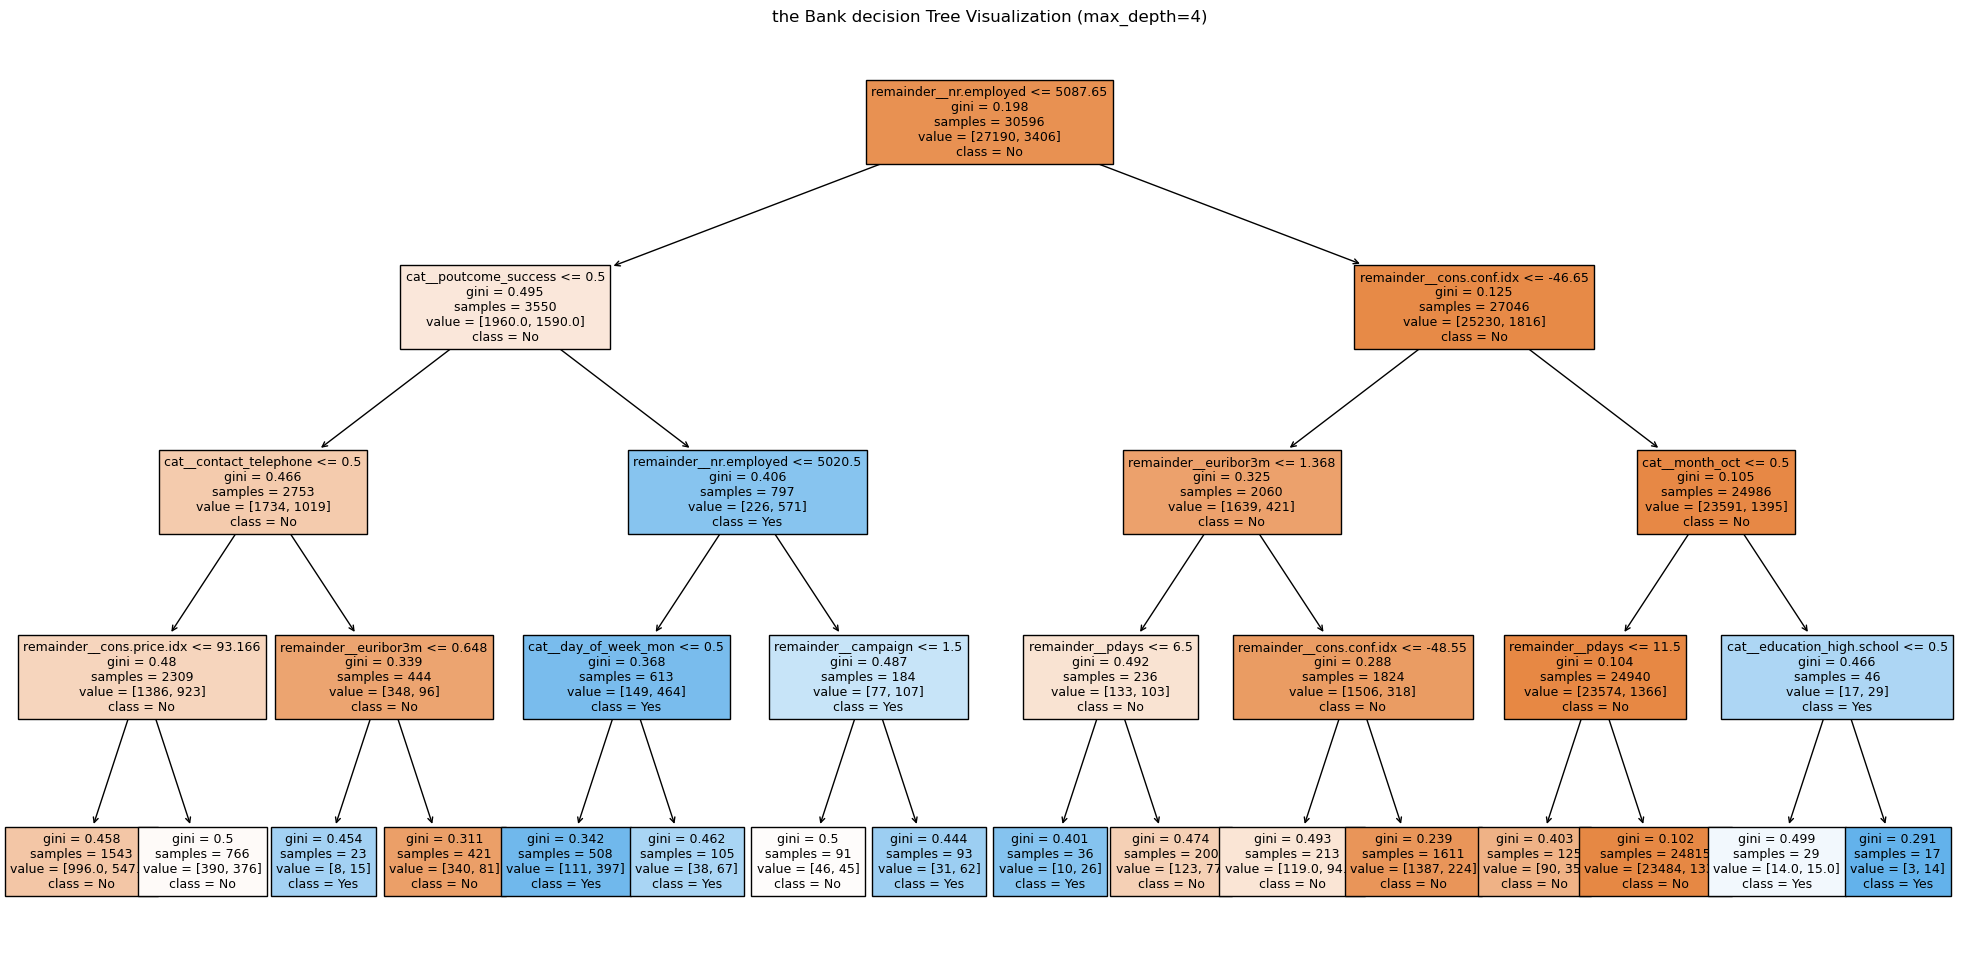

Features used at the top levels of the tree:
- remainder__nr.employed
- remainder__cons.conf.idx
- cat__poutcome_success


In [20]:
#--- Write your code here ---#
from sklearn.tree import DecisionTreeClassifier, plot_tree, _tree
import numpy as np

#--- creating the decisionTree  model and train it of fit it using the bank dataset with max depth of 4 ---#
bank_decision_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
bank_decision_tree.fit(X_train, y_train)

#--- Visualize the bank_decision_tree using plot_tree() ---#
plt.figure(figsize=(25, 12))
plot_tree(
    bank_decision_tree,
    filled=True,
    feature_names=preprocessor.get_feature_names_out(),
    class_names=['No', 'Yes'],
    fontsize= 9
)

plt.title("the Bank decision Tree Visualization (max_depth=4)")
plt.show()



#--- accessing the internal tree structure to print the features after extracting them from the top levels ---#
tree = bank_decision_tree.tree_
feature_names = preprocessor.get_feature_names_out()

#--- defining a function to use a specific levels of the tre, as it take arguments,
# argument level is to define the levels we want as in the question we need to know the features at the top levels not aonly the root level, 
# i could look at the plot but iwanted to make it more profisional :) ---# 
def get_features_at_levels(tree, levels=[0, 1]):
    features = set() 
    node_depth = np.zeros(shape=tree.node_count, dtype=np.int64)
    stack = [(0, 0)]  # (node_id, depth), starting at root node (id=0, depth=0)

    while stack:
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        #--- Only include features that are used for splitting and in the selected levels ---#
        if tree.feature[node_id] != _tree.TREE_UNDEFINED and depth in levels:
            features.add(feature_names[tree.feature[node_id]])

        #---  Traverse left and right child nodes ---# 
        if tree.children_left[node_id] != tree.children_right[node_id]:
            stack.append((tree.children_left[node_id], depth + 1))
            stack.append((tree.children_right[node_id], depth + 1))

    return features   

# --- calling the function and print the h features are used at the top levels of the tree? Are they intuitive? ---# 
top_features = get_features_at_levels(tree, levels=[0, 1])
print("Features used at the top levels of the tree:")
for feature in top_features:
    print("-", feature)


### Task 3 (mandatory): Evaluate Performance and Overfitting
Train the same tree with increasing depths (e.g., 2 to 10). Evaluate on both training and test sets using accuracy and F1 score. Plot Accuracy vs. depth and F1 vs. depth.

**Discuss:** Is there overfitting? Where does performance peak?

--- Your answer here ---


Yes as we can see in the results , the plots show signs of **overfitting** as tree depth increases.

- In the **Accuracy vs. Depth** plot:
  - **Training accuracy** As we see in the results, the training accuracy increases steadily and reaches near-perfect values.
  -  **Test accuracy** while the Test accuracy peaks around **depth 4–5**, then gradually **decreases**, indicating the model is fitting the training data too well and generalizing poorly to unseen data.

- In the **F1 Score vs. Depth** plot:
  - **Training F1 score** As we see in the results, Training F1 score rises consistently with depth.
  - **Test F1 score** while the Test F1 score peaks around **depth 5 or 9**, but overall remains lower than the training score.
  - The fluctuation in F1 scores on the test set also suggests some **instability** in predictions for the minority class.

**over all**,the model performs best around **depth 4 to 5**, offering a good balance between accuracy and generalization, while the Deeper trees start to overfit, especially noticeable in the drop of test accuracy and F1 score after that point.


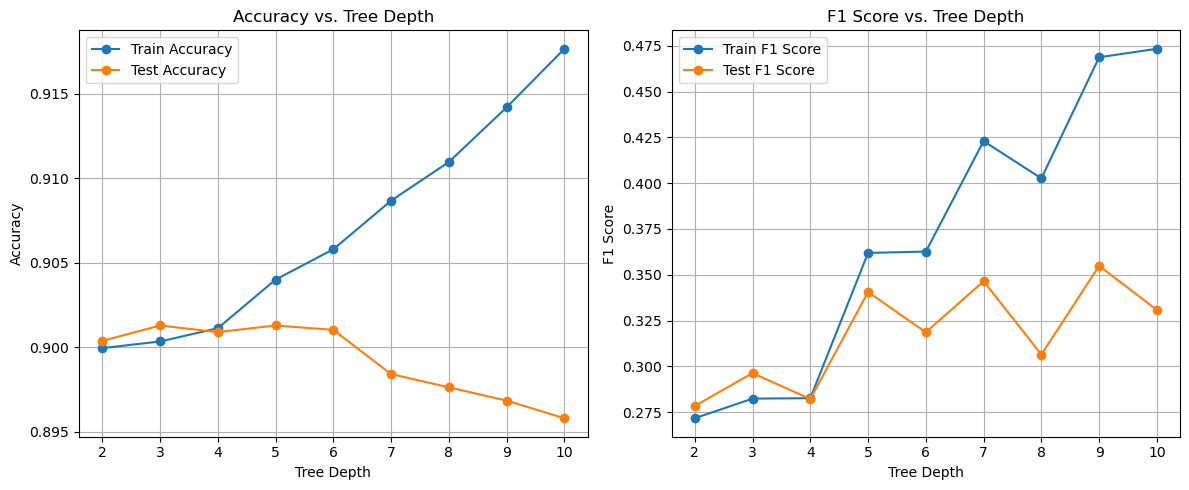

In [21]:
#--- Write your code here ---#
from sklearn.metrics import accuracy_score, f1_score

depths = list(range(2, 11))  
train_accuracies = []
test_accuracies = []
train_f1s = []
test_f1s = []

#--- training the same tree with increasing the depth as we have inteval 2 to 10 ---#
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)

#-- plotting the result ---#
plt.figure(figsize=(12,5))

#--- plotting accuracy ---#
plt.subplot(1, 2, 1)
plt.plot(depths, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Tree Depth')
plt.legend()
plt.grid(True)

#--- plotting the F1 score ---#

plt.subplot(1, 2, 2)
plt.plot(depths, train_f1s, label='Train F1 Score', marker='o')
plt.plot(depths, test_f1s, label='Test F1 Score', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Tree Depth')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

### Task 4 (Mandatory): Train and Compare Ensembles
Train a Random Forest and a Gradient Boosting model.
Tune hyperparameters using grid search (e.g., max_depth, n_estimators).
Do a plot comparing the ROC curves of the three models (Tree, RF, GB).

**Discuss:** Which model performs best and why?

---- Your answers here ----

Based on the ROC curve results, **Gradient Boosting** performs the best, with an AUC score of **0.80**. This suggests it was the most effective at distinguishing between clients who subscribed to a term deposit and those who didn’t.

**Random Forest** also gave strong performance, with an AUC of **0.79**, just slightly behind Gradient Boosting. Meanwhile, the **Decision Tree** had the lowest AUC score of **0.75**, indicating it didn’t generalize as well as the other two.

The reason Gradient Boosting performs better is that it builds trees sequentially, where each new tree focuses on correcting the errors made by the previous ones. This approach makes it more powerful and accurate, especially in datasets like this that have complex patterns.

So while all models did reasonably well, **Gradient Boosting provided the best overall results** in terms of distinguishing between the two classes.


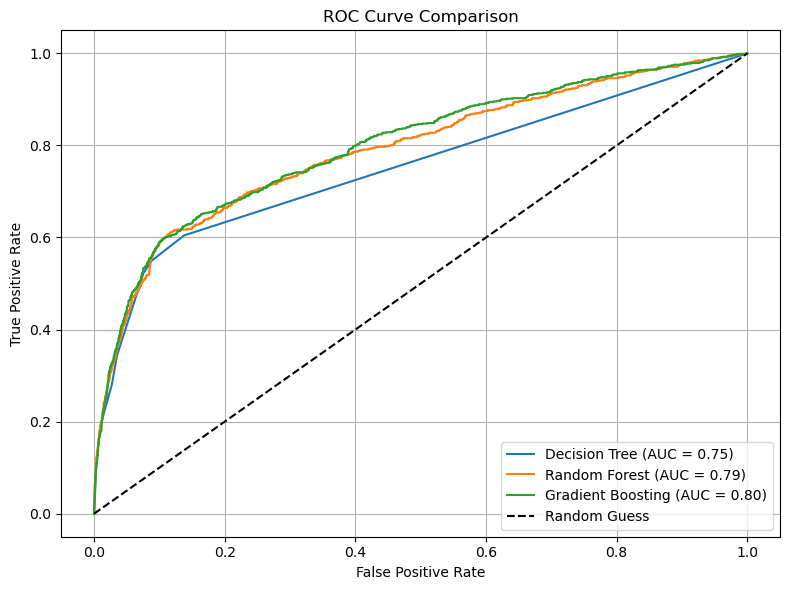

In [22]:
#--- Write your code here ---#
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc


""" creating a random forest model whit random state 42 to ensure the reproducibility, then setup the grid search and tune the model, 
    tries 3 values for the max depth,scoring='roc_auc'to valuate models based on AUC score, 
    and cv = 3 to Use 3-fold cross validation for each combination """

rf = RandomForestClassifier(random_state=42)

rf_grid = GridSearchCV(
    rf,
    param_grid={'n_estimators': [100], 'max_depth': [4, 6, 8]},
    scoring='roc_auc',
    cv=3
)

""" performing the grid search by training the Random Forest on all combinations and then Retrieves the best model from the grid 
search  """
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

gb = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(
    gb,
    param_grid={'n_estimators': [100], 'max_depth': [3, 5, 7]},
    scoring='roc_auc',
    cv=3,
    n_jobs=-1 # it can be used to speed up the process by usig all processors

)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_

dt_probs = bank_decision_tree.predict_proba(X_test)[:, 1]
rf_probs = best_rf.predict_proba(X_test)[:, 1]
gb_probs = best_gb.predict_proba(X_test)[:, 1]

# Get ROC data
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {auc(dt_fpr, dt_tpr):.2f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {auc(rf_fpr, rf_tpr):.2f})")
plt.plot(gb_fpr, gb_tpr, label=f"Gradient Boosting (AUC = {auc(gb_fpr, gb_tpr):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 5 (Non-Mandatory): Feature Importance Analysis

Extract and plot feature importances for the ensemble models.

Plot the top 10 features by importance (bar chart).

**Discuss:** Are these the same features that dominated the decision tree?

---- Your answers here ----


In [23]:
#--- Write your code here ---#

### Task 6 (Non-Mandatory): Test Model Robustness to Noisy Features

Add synthetic noise features to the dataset. 
Generate 5–10 random columns with values sampled from a uniform or normal distribution.
Concatenate them with the original feature set.
Retrain your Random Forest and Gradient Boosting with the noisy features included.
Evaluate their performance on the test set.

Create a Bar plot comparing test set accuracy or F1 score before adding noise and after adding noise. 

**Discuss:** Did model performance degrade? Why or why not?

What does this tell you about the model’s ability to ignore irrelevant features?

Would feature selection or regularization help in this case?

--- Your answer here --- 


In [24]:
#--- Write your code here ---#

## Lecture 7 - Kernels, Maximal Margin Classifiers

### Task 1 (Mandatory): Data Exploration and Preprocessing

Load the dataset using sklearn.datasets.load_breast_cancer().

Standardize the features using StandardScaler.
Use pairplot or PCA to project to 2D and show class separation.

**Discuss:** Do the two classes appear linearly separable?
 
--- Your answer here --- 

Based on the PCA projection, the two classes show a fairly clear separation along the first principal component. While there is some overlap between the classes, most of the data points from each class are grouped in distinct regions.

This indicates that the classes are mostly linearly separable, meaning a linear decision boundary could reasonably separate them. However, since the separation isn’t perfect, more advanced models like SVMs or ensemble methods might still perform better by capturing the subtle overlaps.

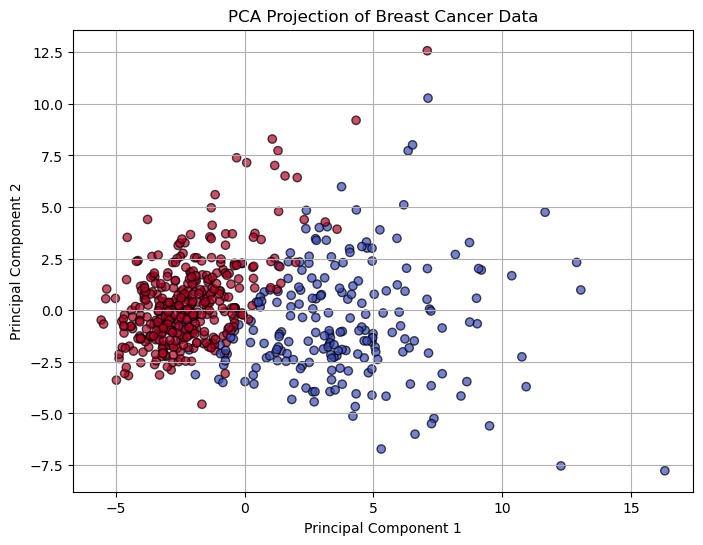

In [25]:
#--- Write your code here ---#
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

""" Load tha dataset 'breastcanser' from sklearn,
    and then extract the feature values X and the target labels
    while the:
        feature_names: names of each feature/column
        target_names: names of the target classes """

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

""" 
    As we know SVM is very sensitive to scale, 
    so we use StandardScaler to normalize the data.
"""
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

"""
    Spliting the normalized data of breast canser data set into test and train data 
"""
cancer_X_train, cancer_X_test, cancer_y_train, cancer_y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

""" OBS: Since the breast cancer dataset contains 30 features,
    using PCA is more appropriate than pairplot. PCA reduces the dimensionality
    while preserving most of the variance, allowing us to visualize class 
    separation clearly in two dimensions.
"""

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

""" Plotting the data after PCA to see if we can visually spot a difference between the two classes.
    Each dot is a person, and the colors show if the tumor is malignant or benign.
    This helps us understand if the features are naturally separable in 2D space."""

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title('PCA Projection of Breast Cancer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### Task 2 (Mandatory): Train Linear and RBF SVMs

Train two SVM classifiers: one with a linear kernel and one with an RBF kernel.

Use a fixed C=1.0, and for RBF, use default gamma='scale'.

Plot the confusion matrices or classification reports for both models.

**Discuss:** Which kernel performed better? Why might that be?

--- Your answer here --- 

Based on the results, the **RBF kernel performed better than the linear kernel**. It achieved higher accuracy and more balanced precision and recall in the classification report.

This is likely because the **RBF kernel can capture complex, non-linear relationships** in the data, while the linear kernel assumes a straight-line decision boundary. Since the breast cancer dataset isn't perfectly linearly separable, the RBF kernel was better at adapting to its structure.

So overall, **RBF gave better results** because it could model the underlying patterns in the data more effectively.

Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

RBF SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



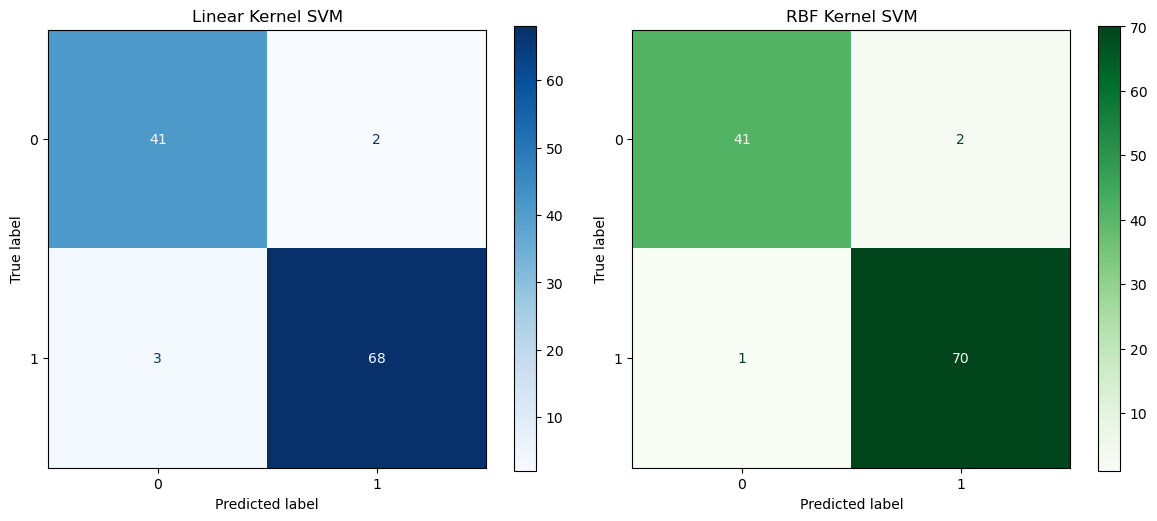

In [26]:
#--- Write your code here ---#
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


""" 
    Creating SVM model with a linear kernel and C=1.0 'controls flexibility'
    and training the model on the training set
    and then predicting the test set labels using the trained model 
"""
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(cancer_X_train, cancer_y_train)
y_pred_linear = svm_linear.predict(cancer_X_test)


""" 
    Creating an SVM model with an RBF 'non-linear' kernel, using C=1.0 and default gamma
    and traing the model on the training set
    then predict the test set labels using the trained RBF model
"""
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale') 
svm_rbf.fit(cancer_X_train, cancer_y_train)
y_pred_rbf = svm_rbf.predict(cancer_X_test)

""" Print the classification report for the Linear SVM model """
print("Linear SVM Classification Report:")
print(classification_report(cancer_y_test, y_pred_linear))

"""
Printing the classification report for the RBF SVM model
"""
print("RBF SVM Classification Report:")
print(classification_report(cancer_y_test, y_pred_rbf))

"""
Plotting confusion matrices side by side for both SVM models.
Left: Linear kernel (blue), Right: RBF kernel (green).
which helps us compare how well each model predicted the classes.
"""
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(cancer_y_test, y_pred_linear, ax=axes[0], cmap="Blues")
axes[0].set_title("Linear Kernel SVM")

ConfusionMatrixDisplay.from_predictions(cancer_y_test, y_pred_rbf, ax=axes[1], cmap="Greens")
axes[1].set_title("RBF Kernel SVM")

plt.tight_layout()
plt.show()


### Task 3 (Mandatory): Hyperparameter Tuning

Use grid search with cross-validation to find optimal values of C and gamma for the RBF kernel.

Plot a heatmap of validation accuracy or F1 score for the grid.

**Discuss:** What combination of hyperparameters gave the best results?

--- Your answer here --- 
 
The best result was achieved with **C = 10.0** and **gamma = 0.01**, giving the highest F1 score of around **0.976**. This combination gave a good balance between model complexity and generalization.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


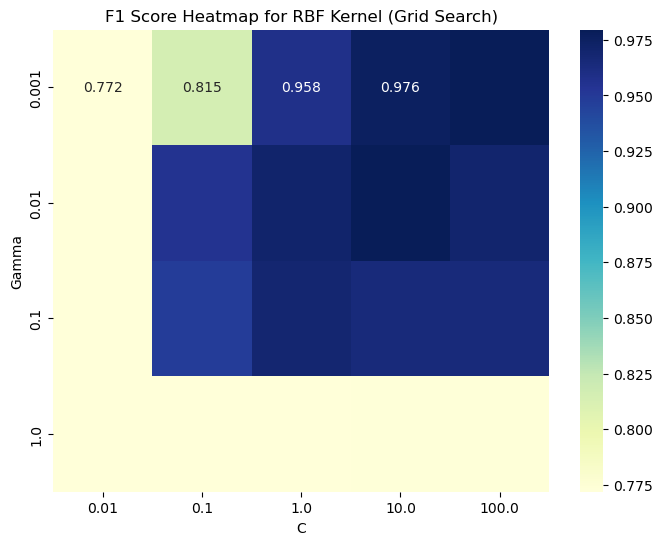

In [27]:
#--- Write your code here ---#
"""definibg the grid's parameters for c and gamma """
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

#param_grid = {
#    'C': [0.1, 1],
#    'gamma': [0.01, 0.1]
#}


""" 
    setting upp the model, 
    and then applying the GridSearchCV with 5-fold CV and F1 scoring
"""
svm_rbf = SVC(kernel='rbf')

grid = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='f1', return_train_score=True,  verbose=1, n_jobs=-1)
grid.fit(cancer_X_train, cancer_y_train)

"""
    Converting the results into DataFrame for plotting,
    and them plotting heatmap
"""
results = pd.DataFrame(grid.cv_results_)
scores_matrix = results.pivot(index='param_gamma', columns='param_C', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(scores_matrix, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("F1 Score Heatmap for RBF Kernel (Grid Search)")
plt.xlabel("C")
plt.ylabel("Gamma")
plt.show()



### Task 4 (non-mandatory): Investigate the Effect of the Regularization Parameter C

Train RBF SVM models for a wide range of C values (e.g., 0.001, 0.01, 0.1, 1, 10, 100), keeping gamma fixed.

For each model, record training and test accuracy or F1 score.

Plot the training and test scores vs. C (line plot).

**Discuss:**

- What happens when C is very small or very large?

- What does this tell you about the role of C in the SVM objective?

--- Your answer here --- 

In [28]:
#--- Write your code here ---#

### Task 5 (non-mandatory): Compare SVM with Logistic Regression

Train a logistic regression model on the same (standardized) data.

Compare its performance with your best-performing SVM.

Plot, side-by-side bar plot of accuracy, precision, recall, and F1 score for both models.

**Discuss:**

- Which model performed better overall?

- Were there significant differences in false positives or false negatives?

- Based on your task (e.g., cancer detection), which type of error is more costly?

In [29]:
#--- Write your code here ---#

## Lecture 8 - Clustering (All Mandatory)

In this assignment you will implement an unsupervised learning method, then you will test it with data sets of your choice. 

You must deliver the results in a jupyter notebook, combining the code, text, and images in a nice readable sequence.

**Goal:** Implement the clustering algorithm called Bisecting k-Means.
Bisecting k-Means [1] is a clustering algorithm that combines hierarchical clustering with k-Means. However, differently than the hierarchical clustering we saw in the lecture, it uses a divisive, top-down approach (instead of the agglomerative, bottom-up that we are used to). It consists on the steps described below:

1. Start with a single cluster including all the observations in the data set.
2. [Bisecting] Divide the largest cluster into two smaller sub-clusters using k-Means.
3. Redo the bisecting step iter times and choose the best solution according to the Sum of Squared Errors (SSE).
4. Repeat from Step 2 until you have k clusters.

Implement the Bisecting k-Means algorithm in a function called bkmeans. It should take as input: (a) the data X to cluster, as a n × p matrix (n observations by p features); (b) the number k of clusters; and (c) the number iter of iterations for step 3. It should generate as output a n × 1 vector with the cluster indices for each of the n observations.
Notes:
1. You must implement K-Means yourself, from scratch.
2. The requirements are strict. I will use standard test cases in order to test your solution by calling the function
bkmeans as described.

[1] M. Steinbach, G. Karypis, V. Kumar et al., “A comparison of document clustering techniques,” in
KDD workshop on text mining, vol. 400, no. 1. Boston, 2000, pp. 525–526. [Online]. Available:
http://glaros.dtc.umn.edu/gkhome/fetch/papers/docclusterKDDTMW00.pdf

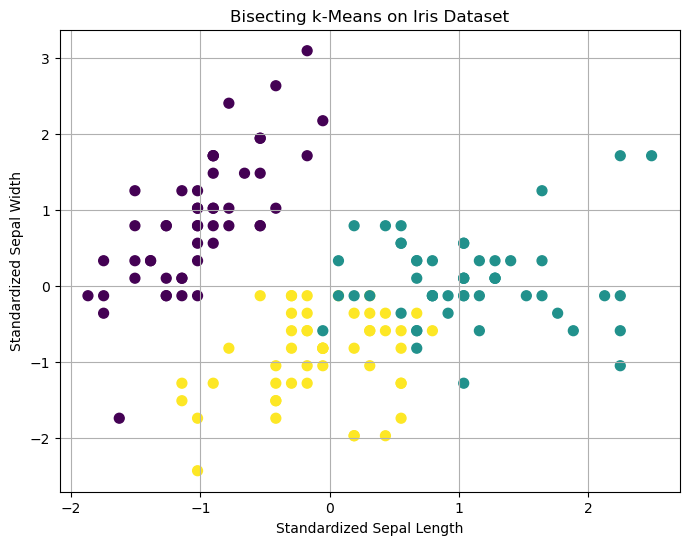

In [33]:
#--- Write your code here ---#
from sklearn.preprocessing import StandardScaler
""" 
    Load the Iris dataset (only the features) from the CSV file
    This data was saved earlier from sklearn and contains 150 samples with 4 numeric features
"""
iris_X = np.loadtxt("datasets/your_datasets/iris_data.csv", delimiter=",")

"""
    This function runs a basic k-Means clustering algorithm with k = 2.
    It randomly picks two starting points as centroids, assigns each data point to the nearest one,
    updates the centroids, and repeats until convergence or max iterations is reached.
    It returns the final labels, centroids, and SSE (error) for each of the two clusters.
"""
def kMeans(X, max_iter=100):
    n_samples = X.shape[0]
    rng = np.random.default_rng()

    """picking 2 initial centroids randomly"""
    indices = rng.choice(n_samples, size=2, replace=False)
    centroids = X[indices]

    for _ in range(max_iter):
        """Assigning points to the nearest centroid"""
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)    
        labels = np.argmin(distances, axis=1)

        """ Recomputing the centroids"""
        new_centroids = np.array([
            X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i]
            for i in range(2)
        ])

        """ Stopping the process in case the centroids don't change"""
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    """ Calculating the SSE for each cluster"""
    sse = [np.sum((X[labels == i] - centroids[i])**2) for i in range(2)]

    return labels, centroids, sse

"""
     This function runs the Bisecting k-Means clustering algorithm.
     It starts with all the data points in a single cluster, then repeatedly finds
     the cluster with the highest SSE the 'least compact one' and splits it into two
     using basic k-Means with k=2. It tries this split multiple times according 'iter : number of iteration'
     and keeps the one with the lowest total SSE.
     The process continues until the total number of clusters reaches k.
     And finally, the function returns a label for each data point indicating its cluster.
"""
def bkMeans(X, k, iter):
    n_samples = X.shape[0]

    """ Starting with the all samples in one cluster"""
    clusters = {0: np.arange(n_samples)}
    sse_dict = {0: np.sum((X - X.mean(axis=0))**2)}
    next_cluster_id = 1

    while len(clusters) < k:
        """ Selecting the cluster with the highest SSE to split"""
        cluster_to_split = max(sse_dict, key=sse_dict.get)
        indices_to_split = clusters[cluster_to_split]
        best_total_sse = None

        """ Trying 'iter' times and choose the best split"""
        for _ in range(iter):
            labels2, _, sse2 = kMeans(X[indices_to_split])
            total_sse = sum(sse2)
            if best_total_sse is None or total_sse < best_total_sse:
                best_labels2 = labels2.copy()
                best_sse2 = sse2

        """ Spliting the selected cluster into two new clusters"""
        mask0 = best_labels2 == 0
        mask1 = best_labels2 == 1

        idx0 = indices_to_split[mask0]
        idx1 = indices_to_split[mask1]

        clusters[cluster_to_split] = idx0
        clusters[next_cluster_id] = idx1

        sse_dict[cluster_to_split] = best_sse2[0]
        sse_dict[next_cluster_id] = best_sse2[1]

        next_cluster_id += 1

    """ Assigning the final labels"""
    final_labels = np.empty(n_samples, dtype=int)
    for cluster_id, point_indices in enumerate(clusters.values()):
        final_labels[point_indices] = cluster_id

    return final_labels

"""
    Standardize the data abd then running the clustering  
"""
scaler = StandardScaler()
iris_X_scaled = scaler.fit_transform(iris_X)
labels = bkMeans(iris_X_scaled, k=3, iter=10)


"""
    Visualizing the clustering result using the first two features of the dataset
    while each point is colored according to the cluster it was assigned to
"""
plt.figure(figsize=(8, 6))
plt.scatter(iris_X_scaled[:, 0], iris_X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Bisecting k-Means on Iris Dataset")
plt.xlabel("Standardized Sepal Length")   
plt.ylabel("Standardized Sepal Width")    
plt.grid(True)
plt.show()


## Lecture 9 - Dimensionality Reduction 

### Task 1 (mandatory)

In this exercise you will visualize and explore the results of the previous exercise in a simple manner, using scatterplots.
This will be a relatively open-ended task; you will choose three data sets and explore them with the new technique you built for yourself. 

These could be data sets you already used in previous assignments, or you could download some
new data. The only restrictions are that (a) the data sets must be multidimensional (i.e., more than 4 features), (b) they must have labels, and (c) they must have at least 1000 data points.

These are some examples of interesting places to obtain new data sets:

* http://archive.ics.uci.edu/ml/index.php
* https://www.openml.org/search?type=data
* https://www.kaggle.com/datasets

Be careful, however, with the size of the data set you choose. Python can get quite slow with too much data, and the scatterplots will also be very crowded, so go for smaller data sets this time.

**Important**: Download the datasets and put them under the folder *datasets* so that we can run your code.

Successfully loaded 'wine_dataSet' with shape (6497, 13)
Successfully loaded 'heart_dataSet' with shape (918, 12)
Successfully loaded 'fashion_dataSet' with shape (2000, 785)

--- Processing: wine_dataSet ---
Non-numeric columns detected, cleaning...


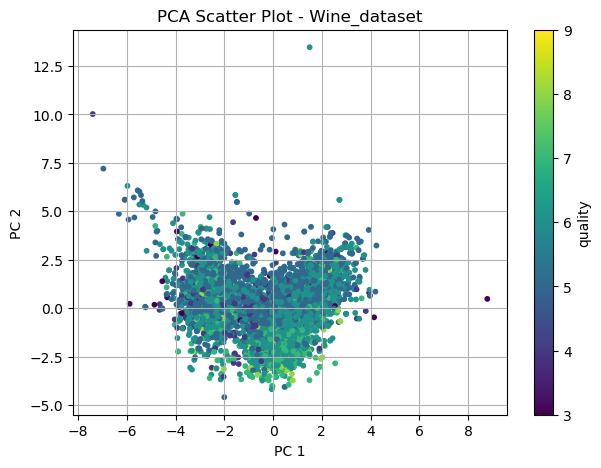


--- Processing: heart_dataSet ---
Non-numeric columns detected, cleaning...


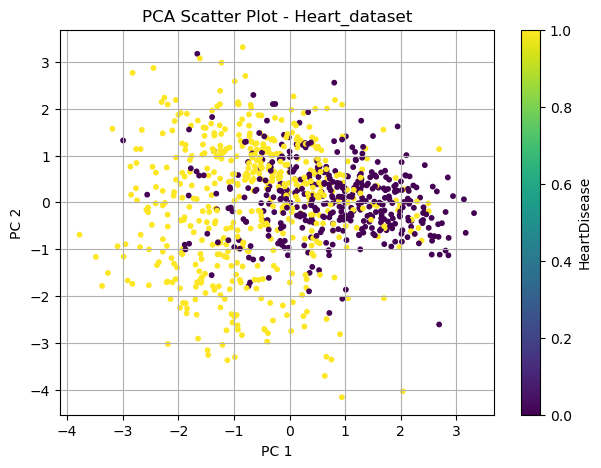


--- Processing: fashion_dataSet ---


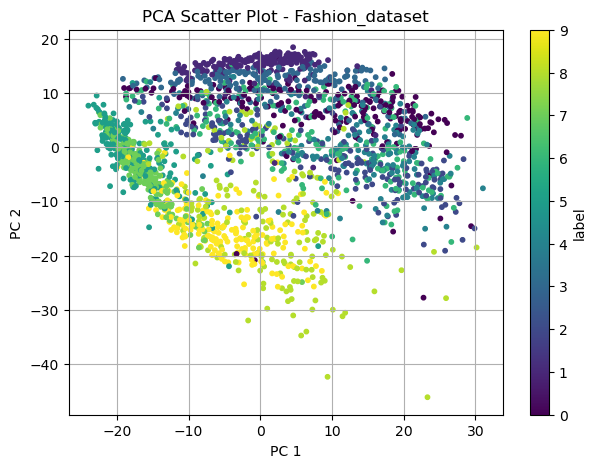

In [31]:
#--- Write your code here ---#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#--- beacuse we have more than one data set at this task, i wanted to do it in this way by using dictionary and check if the loading procces is done successfully or not :) ---#
""" 
    loading data sets after defining tha pathes and check if the data is successfully loaded
"""

datasets = {}

paths = {
    "wine_dataSet": "datasets/wine_combined.csv",
    "heart_dataSet": "datasets/heart.csv",
    "fashion_dataSet": "datasets/fashion_subset.csv"
}

for name, path in paths.items():
    try:
        df = pd.read_csv(path)
        datasets[name] = df
        print(f"Successfully loaded '{name}' with shape {df.shape}")
    except FileNotFoundError:
        print(f" File for '{name}' not found at path: {path}")
    except pd.errors.ParserError:
        print(f"Parsing error occurred when loading '{name}'. Check the CSV format.")
    except Exception as e:
        print(f" Unexpected error loading '{name}': {e}")


"""
    a dictionary that stores the label column name for each dataset,
    so I can easily separate features and labels later.
"""
dataset_info = {
    "wine_dataSet": {
        "label_column": "quality",
    },
    "heart_dataSet": {
        "label_column": "HeartDisease",
    },
    "fashion_dataSet": {
        "label_column": "label",
    }
}

"""
    creating the function myPca 'Manual implementation of PCA from scratch' which Perfors the Principal Component Analysis (PCA) from scratch,
    while the arameters are X: numpy array of shape 'n_samples, n_features', the input data.
    and n_components: int, the number of principal components to keep.
    myPca function returns X_pca which is numpy array of shape 'n_samples, n_components', the projected data.
    n_components=2 thats beacuse we want to use scatterplots.
"""

def myPca(X, n_components=2):
    """
        starting by center data 'zero mean', compute covariance, extract top eigenvectors, and then project to lower dimension

    """
    X_centered = X - np.mean(X, axis=0)
    covariance_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_components = eigenvectors[:, sorted_indices[:n_components]]
    X_pca = np.dot(X_centered, top_components)
    return X_pca


"""
    defining a function that slots the 2D PCA result using a scatter plot.
    while the parameters are:
    * X_pca: numpy array of shape 'n_samples, 2', result from PCA projection
    * y: numpy array of shape (n_samples,), labels for coloring
    * title: title of the plot
    * label_name: name shown in the color bar
"""
def plot_pca_result(X_pca, y, title="PCA Scatter Plot", label_name="Label"):
    
    plt.figure(figsize=(7, 5))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=10)
    plt.title(title)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.grid(True)
    plt.colorbar(scatter, label=label_name)
    plt.show()

"""
Looping through each dataset and apply PCA visualization,
Using dataset_info to dynamically get label columns,
which makes the code reusable and avoids hardcoding dataset specific logic.
"""
for name, df in datasets.items():
    print(f"\n--- Processing: {name} ---")

    
    if df.select_dtypes(exclude=[np.number]).shape[1] > 0:   # \
        print("Non-numeric columns detected, cleaning...")   # - check if there is any column with numric data and clean it beacuse in myPca we need only numric data.
        df = df.select_dtypes(include=[np.number])           # - beacuse i hade problem with heart_dataSet that it contains some non numric columns.
                                                             # /

    label_column = dataset_info[name]["label_column"]
    task_9_X = df.drop(columns=[label_column]).values
    task_9_y = df[label_column].values
    task_9_label_name = label_column  

    task_9_scaled_X = StandardScaler().fit_transform(task_9_X)
    X_pca = myPca(task_9_scaled_X, n_components=2)
    plot_pca_result(X_pca, task_9_y, title=f"PCA Scatter Plot - {name.capitalize()}", label_name=task_9_label_name)


In [32]:
#--- Write your code here ---#

### Task 2 (non-mandatory) - Comparison of DR Techniques

Generate a scatterplot matrix comparing the results of three DR techniques: PCA, MDS, and t-SNE, for each data set chosen in the previous exercise. 
The resulting visualization should be a 3 × 3 matrix where each cell is a scatterplot of a DR technique applied to a data set. 
Color the points by their target variables (i.e., class/labels) using a qualitative colormap.

Then answer this shortly (in a couple of paragraphs): 
- In your opinion, which technique performed the best for each data set, regarding the separation of the classes? 
- How are the classes in the data sets separated? 
- Are some classes easier to separate than others?


### Task 3 (non-mandatory): Comparison of Clustering Techniques

Choose one of the DR techniques from the previous exercise and generate a similar scatterplot matrix to compare the results of Bisecting k-Means with classic k-Means and hierarchical clustering for each data set. 
The resulting visualization should be a 3 × 3 matrix where each cell is a scatterplot of the chosen DR technique applied to a data set, with the colors of the points showing the clusters using a qualitative colormap (see, e.g., https://matplotlib.org/tutorials/colors/colormaps.html).

Then answer this shortly (in a couple of paragraphs): 
- In your opinion, which clustering technique performed the best for each data set? 
- How are the clusters in the data sets separated? 
- Are some clusters easier to separate than others?